# Clustering Countries Assignment
### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
### They have been able to raise around 10 million dollar. Now the management of the NGO needs to decide how to use this money strategically and effectively.
#### Actionable : Need to categorise the countries using socio-economic and health factors that determine the overall development of the country.
#### Step to follow to suggest management the priorty of the country to be given aid :

### EDA

- 1.Outlier analysis

- 2.K-means

- 3.Hierarchical clustering(both single and complete linkage)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [3]:
#load the dataset
country=pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#checck the columns and innfo of data set
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#describe the datas for the numerical features
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# shape of the dataset
country.shape

(167, 10)

In [7]:
#checking for null values columns wise
(country.isnull().sum()/len(country.index))*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [8]:
# checking the null values n the rows
(country.isnull().sum(axis=1)/len(country.index))*100

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
162    0.0
163    0.0
164    0.0
165    0.0
166    0.0
Length: 167, dtype: float64

In [9]:
country.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [10]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Quality Check

In [11]:
#change the % to the number by multiplying with the gdpp
country.exports=(country.exports*country.gdpp)/100
country.imports=(country.imports*country.gdpp)/100
country.health=(country.health*country.gdpp)/100

In [12]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Univariate Analysis

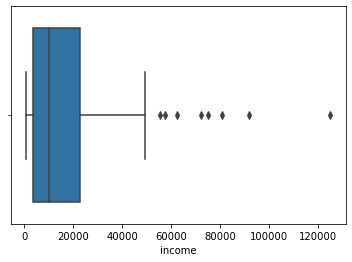

In [13]:
#box plot of income
sns.boxplot(country.income)
plt.show()

Inference:- The features contains outliers .The median of income lies in 10k.

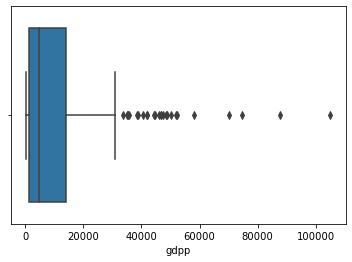

In [14]:
#box plot for gdpp
sns.boxplot(country.gdpp)
plt.show()

Inference:- The gdpp having a median value of 10k. The feature contains some extreme values

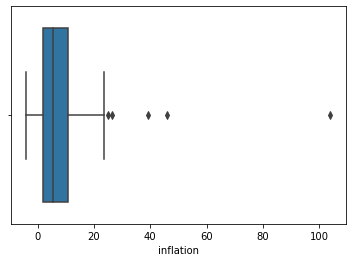

In [15]:
#box plot for inflation
sns.boxplot(country.inflation)
plt.show()

inference:- The inflation median value is 10

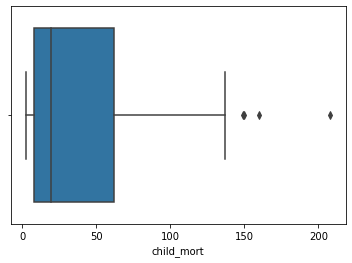

In [16]:
#box plot for child_mort
sns.boxplot(country.child_mort)
plt.show()

Inference:-child_mort feature contains median value of 20 but the maximum data lies in upper bound

In [17]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [18]:
col=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

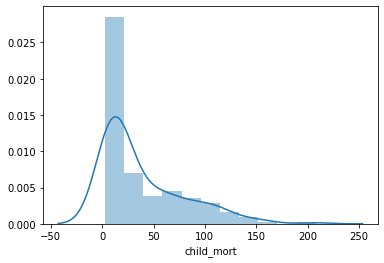

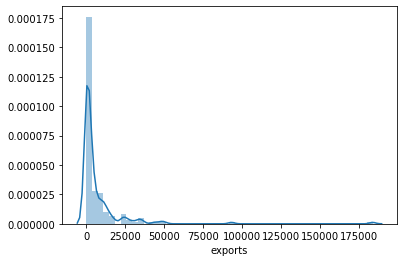

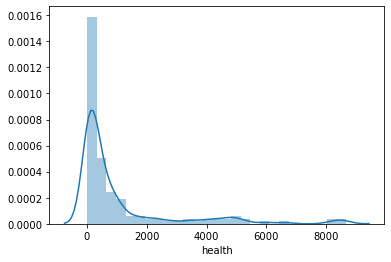

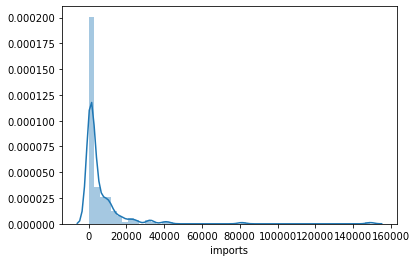

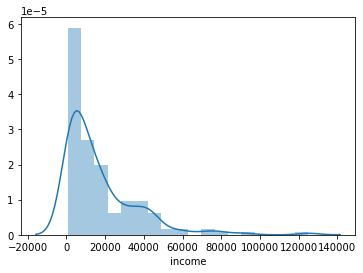

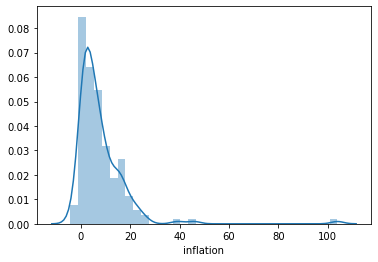

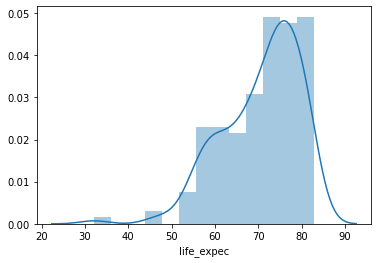

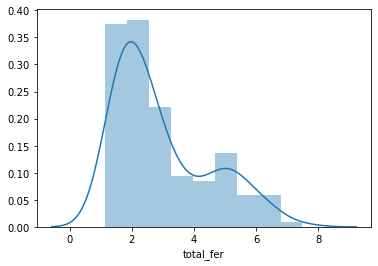

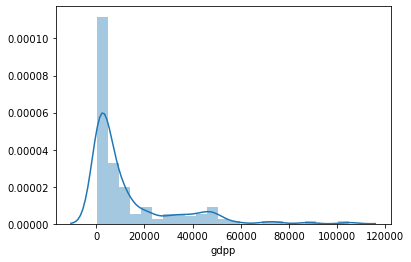

In [19]:
#plotting distplot for all the features
for c in col:
    sns.distplot(country[c])
    plt.show();

## BiVariate Analysis

In [20]:
def scatterplot(z):
    sns.scatterplot(x=z,y='gdpp',data=country)
    plt.show()

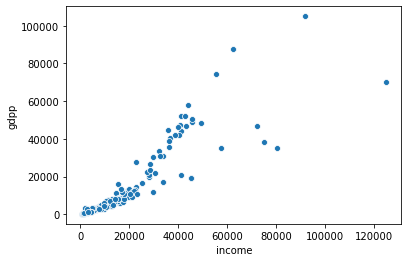

In [21]:
scatterplot('income')

Inference:- As income increases gdpp also increases maximum data points are lies in lower part around 10k.

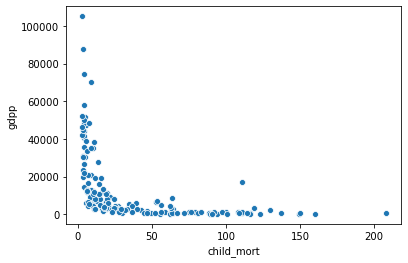

In [22]:
scatterplot('child_mort')

Inference:-Child_mort is maximum when the gdpp value is low.

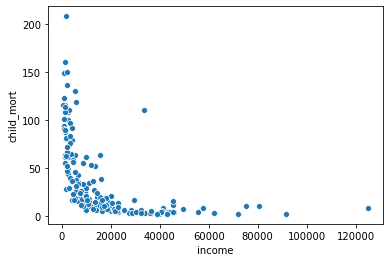

In [23]:
sns.scatterplot('income','child_mort',data=country)
plt.show()

Inference:-The Child_mort is maximum at lower income range

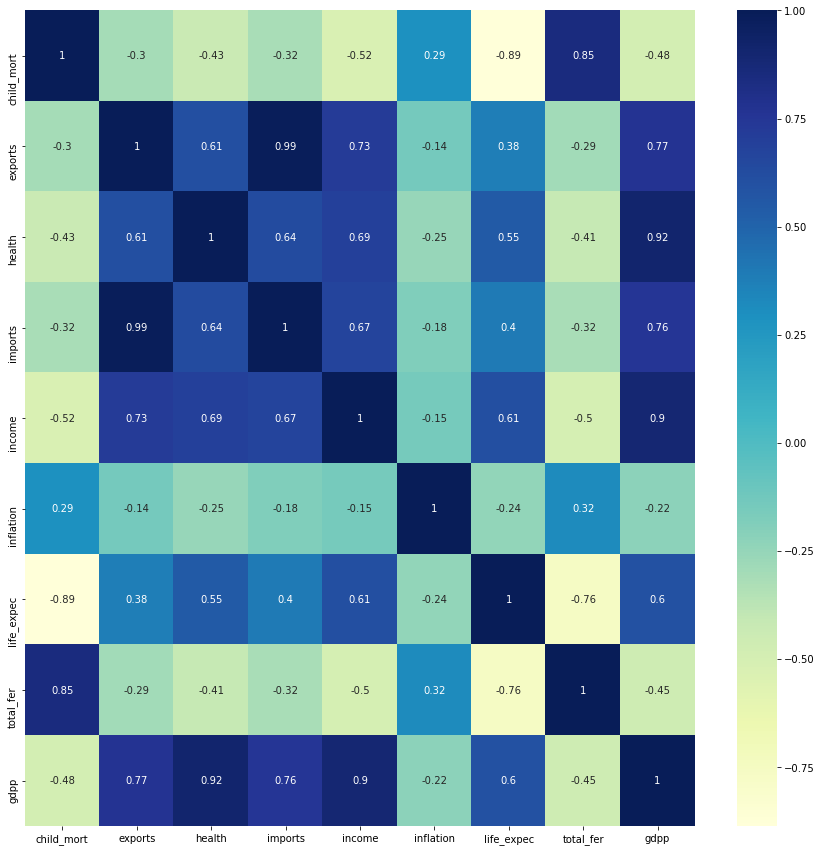

In [24]:
#plot heatmap to show the correlations between features
plt.figure(figsize = (15,15))        
sns.heatmap(country.corr(),annot = True,cmap="YlGnBu")
plt.show()

<Figure size 288x288 with 0 Axes>

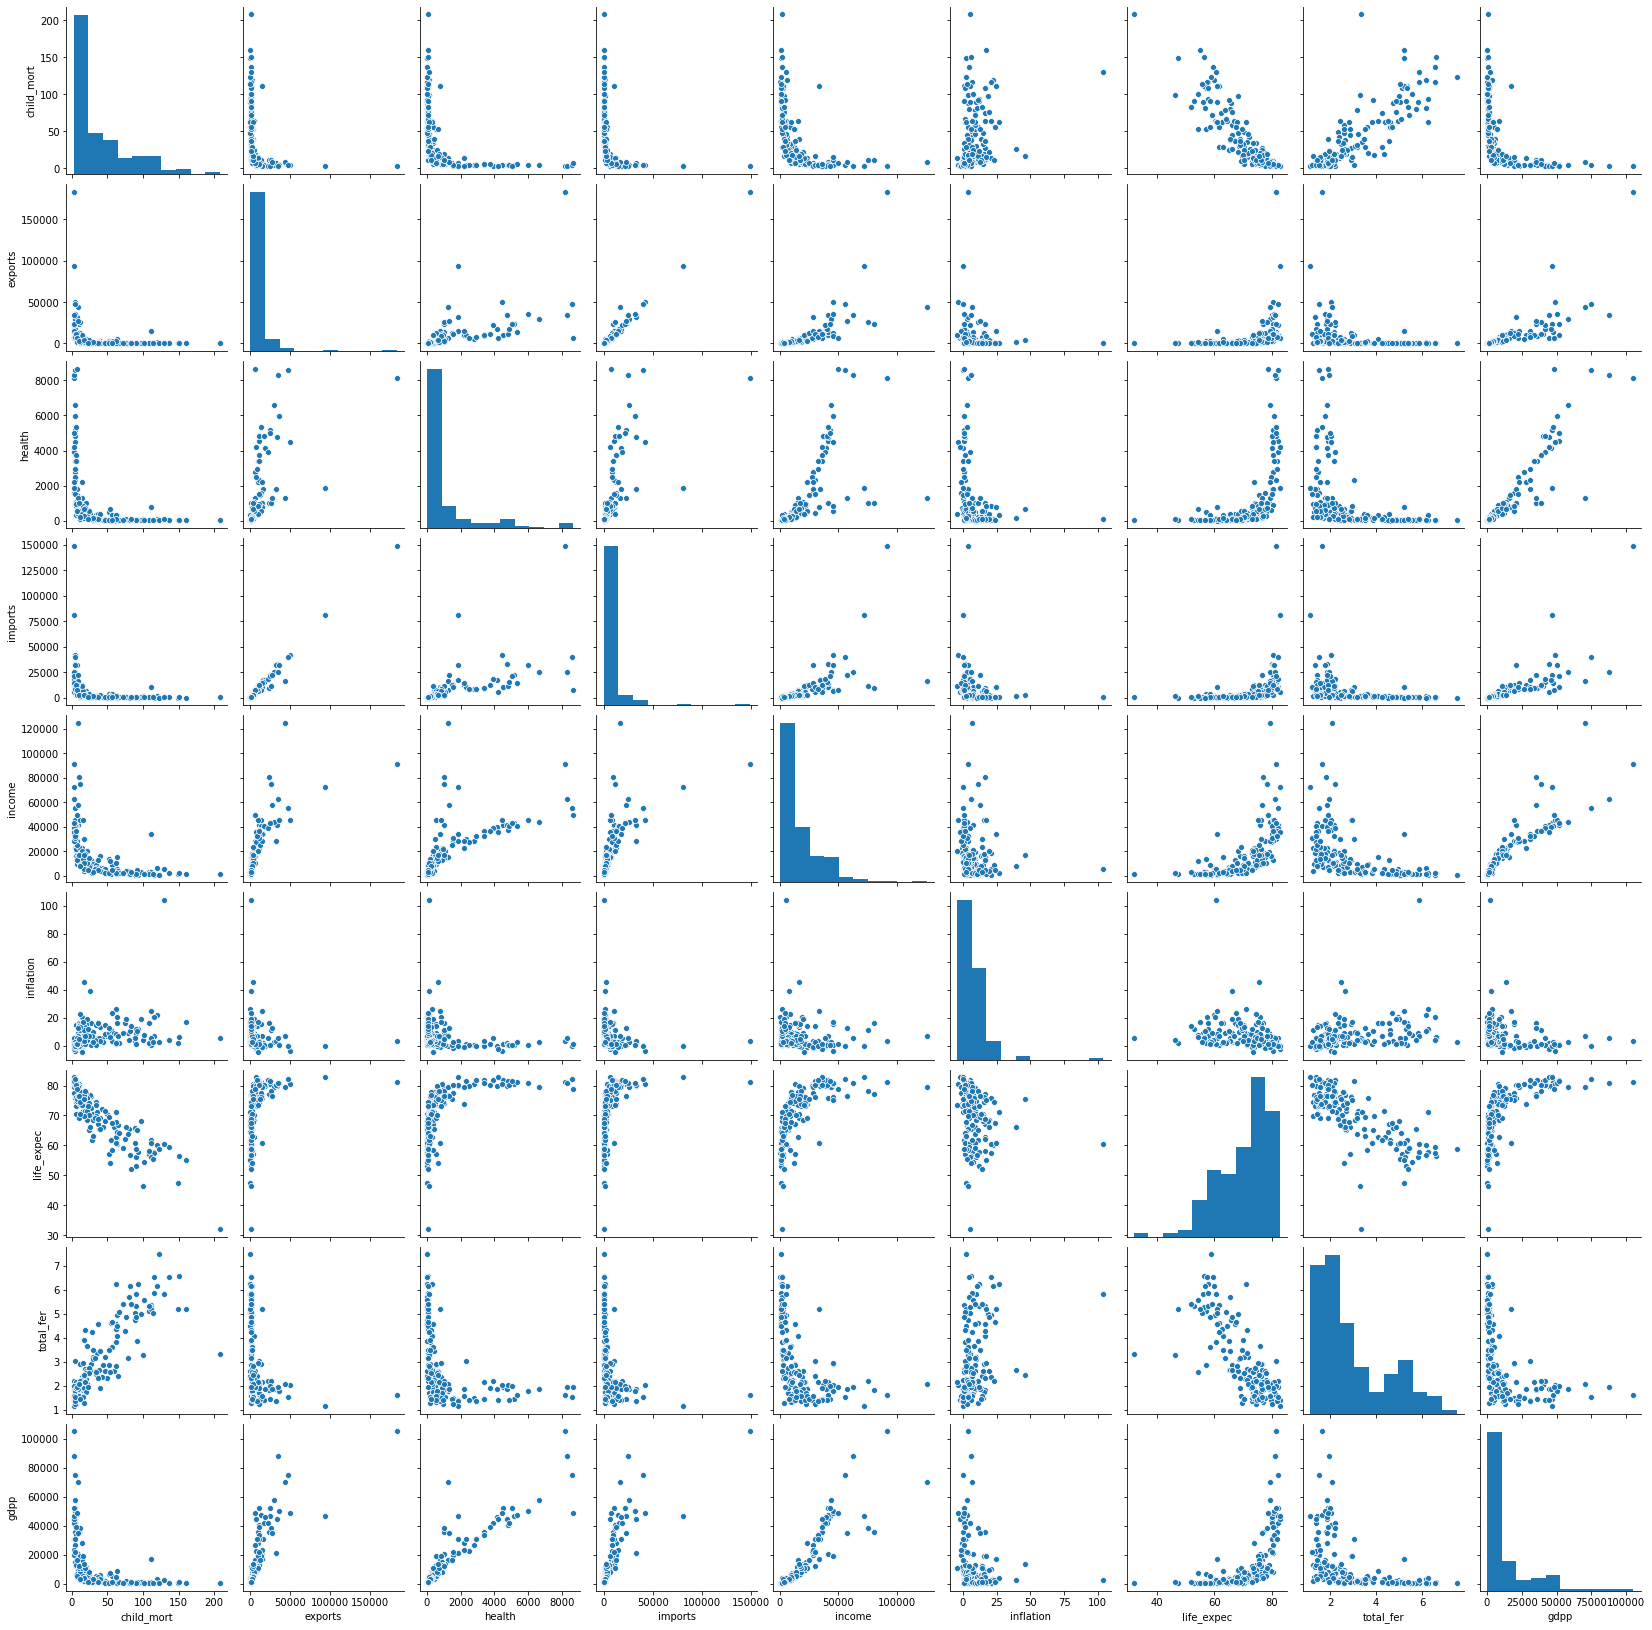

In [25]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country)
plt.show()

## Outlier Treatment

In [26]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [27]:
col1=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

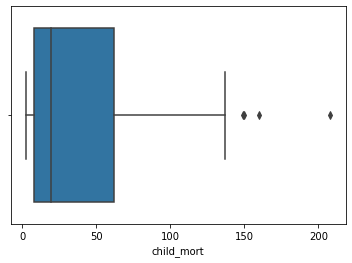

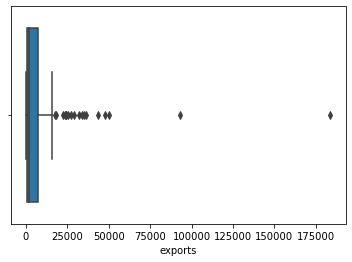

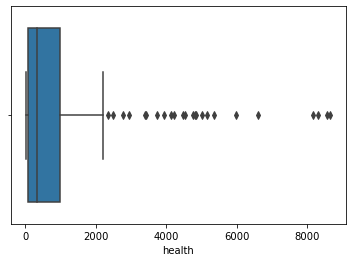

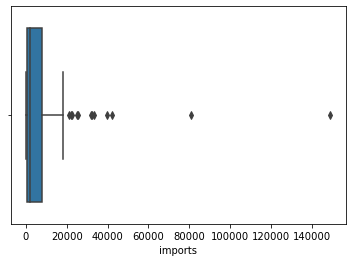

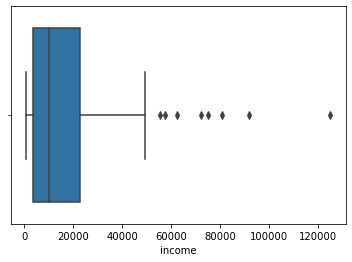

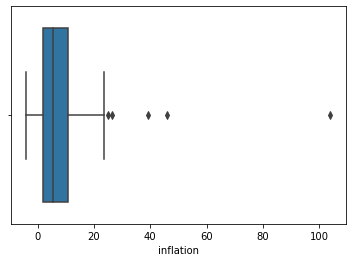

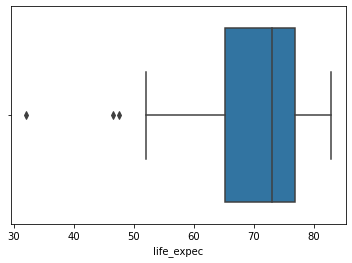

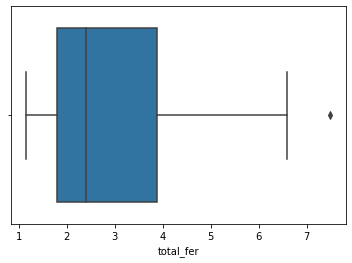

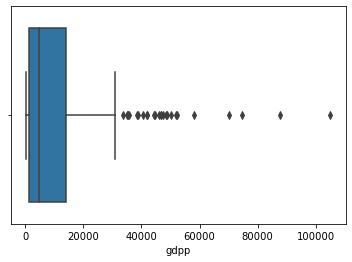

In [28]:
#to check the outliers for each features
for c in col1:
    sns.boxplot(country[c])
    plt.show()

#### Capping all the Outliers to 0.01 and 0.99 %ile of all data

Capping lower side datas for features Child_mort,total_fer and all rest features capping upper side only

In [29]:
percentiles = country['child_mort'].quantile([0.01,0.99]).values
country['child_mort'][country['child_mort'] <= percentiles[0]] = percentiles[0]

In [30]:
percentiles = country['health'].quantile([0.01,0.99]).values
country['health'][country['health'] >= percentiles[1]] = percentiles[1]

In [31]:
percentiles = country['life_expec'].quantile([0.01,0.99]).values
country['life_expec'][country['life_expec'] >= percentiles[1]] = percentiles[1]

In [32]:
percentiles = country['total_fer'].quantile([0.01,0.99]).values
country['total_fer'][country['total_fer'] <= percentiles[0]] = percentiles[0]

In [33]:
percentiles = country['income'].quantile([0.01,0.99]).values
country['income'][country['income'] >= percentiles[1]] = percentiles[1]

In [34]:
percentiles = country['inflation'].quantile([0.01,0.99]).values
country['inflation'][country['inflation'] <= percentiles[0]] = percentiles[0]
country['inflation'][country['inflation'] >= percentiles[1]] = percentiles[1]

In [35]:
percentiles = country['gdpp'].quantile([0.01,0.99]).values
country['gdpp'][country['gdpp'] >= percentiles[1]] = percentiles[1]

In [36]:
percentiles = country['imports'].quantile([0.01,0.99]).values
country['imports'][country['imports'] >= percentiles[1]] = percentiles[1]

In [37]:
percentiles = country['exports'].quantile([0.01,0.99]).values
country['exports'][country['exports'] >= percentiles[1]] = percentiles[1]

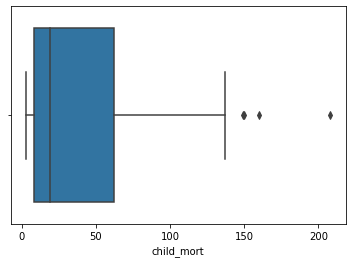

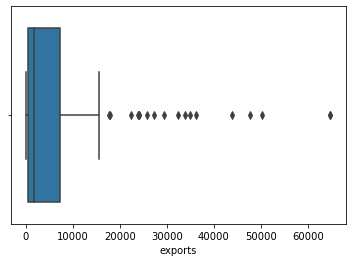

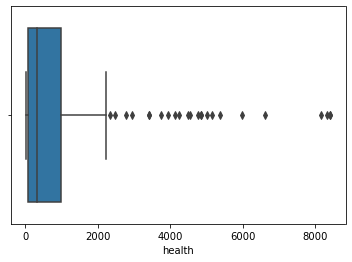

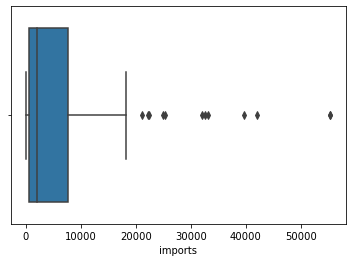

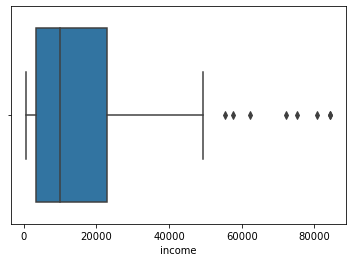

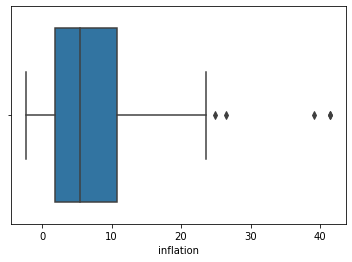

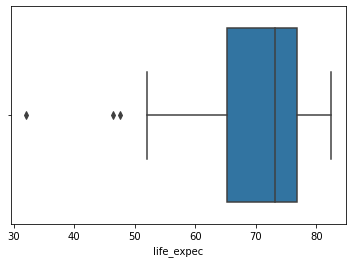

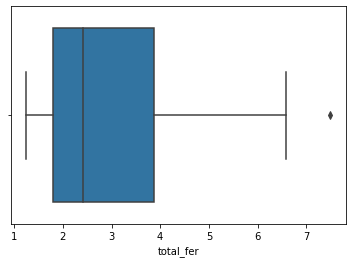

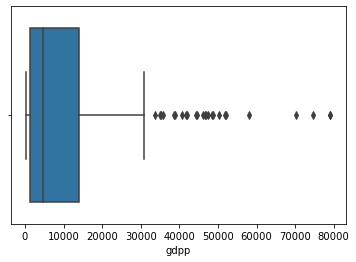

In [38]:
#check after the outlier treatment
for c in col1:
    sns.boxplot(country[c])
    plt.show()

# Scaling The Data

In [39]:
df=country.drop('country',axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [40]:
# Create a scaling object
scaler = StandardScaler()

# Create a list of the numerical variables that needs to be scaled
numlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Scale these variables using 'fit_transform'
country_scaled = scaler.fit_transform(df[numlist])

In [41]:
country_scaled = pd.DataFrame(country_scaled, columns = numlist)
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.263649,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.375251,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.123260,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.936405,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.768917,0.705262,-0.542634,-0.032042


In [42]:
#calculating hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
hopkins(country_scaled)

0.8949849644788548

As the value of hopkins statistic is more than 0.6 the formation of cluster is possoble for the data set

# Finding the Optimal Number of Clusters

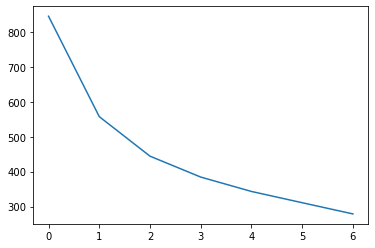

In [44]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

From the above plot we can conclude that the no of cluster K value should bw equal to 3.

## Silhouette Analysis


In [45]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.46944247523483995
For n_clusters=3, the silhouette score is 0.4028976651182132
For n_clusters=4, the silhouette score is 0.39141264907100454
For n_clusters=5, the silhouette score is 0.38364030094162915
For n_clusters=6, the silhouette score is 0.29364150996530747
For n_clusters=7, the silhouette score is 0.3045978394648686
For n_clusters=8, the silhouette score is 0.31585585536598043


In [46]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_scaled)
    sse_.append([k, silhouette_score(country_scaled, kmeans.labels_)])

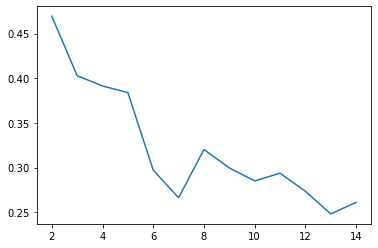

In [47]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From the above plot we can consider the K value as equal to 3.

## Model Building by using K-Means Algorirhm

In [48]:
# final model with k=3
country_clust = KMeans(n_clusters=3, max_iter=50,random_state=50)
country_clust.fit(country_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [49]:
country_clust.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [50]:
country['cluster_id']=country_clust.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [51]:
country.cluster_id.value_counts()

0    90
2    48
1    29
Name: cluster_id, dtype: int64

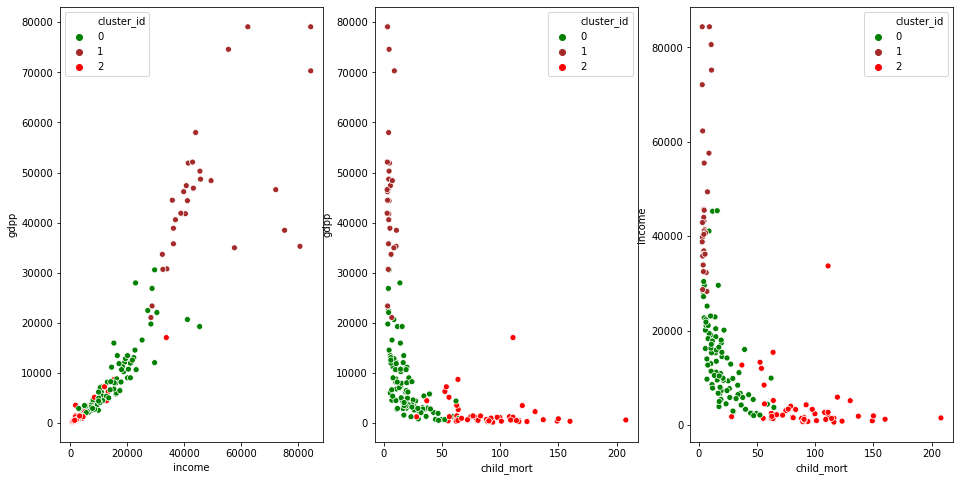

In [52]:
# scatterplot for 3 Feature consider for clustering the datas
plt.figure(figsize=[16,8])
plt.subplot(1,3,1)
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',data=country,palette=['green','brown','red'])

plt.subplot(1,3,2)
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',legend='full',data=country,palette=['green','brown','red'])
 
plt.subplot(1,3,3)
sns.scatterplot(x='child_mort',y='income',hue='cluster_id',legend='full',data=country,palette=['green','brown','red'])
plt.show()

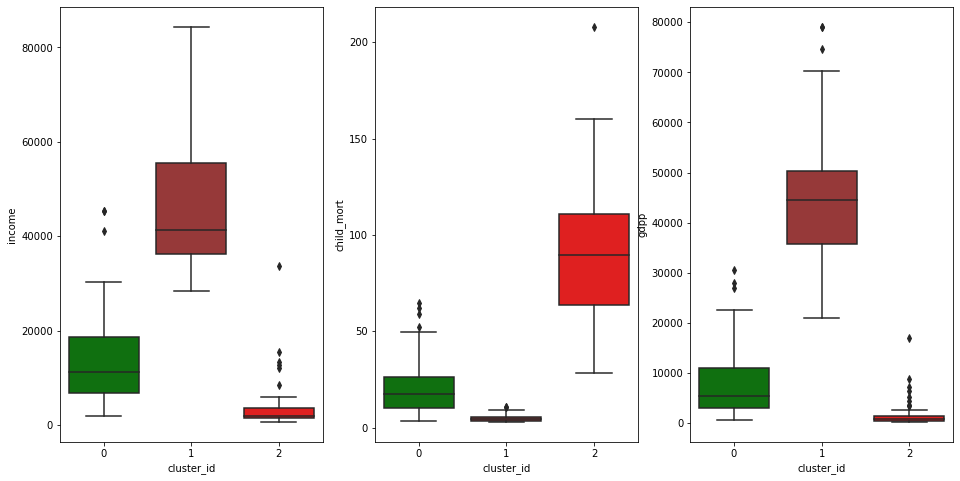

In [53]:
plt.figure(figsize=[16,8])
plt.subplot(1,3,1)
sns.boxplot(y='income',x='cluster_id',data=country,palette=['green','brown','red'])

plt.subplot(1,3,2)
sns.boxplot(y='child_mort',x='cluster_id',data=country,palette=['green','brown','red'])
 
plt.subplot(1,3,3)
sns.boxplot(y='gdpp',x='cluster_id',data=country,palette=['green','brown','red'])
plt.show()

In [54]:
res1=country[['child_mort','income','gdpp']].groupby(country['cluster_id']).mean()
res1

,child_mort,income,gdpp
cluster_id,,,
0,20.547778,13804.333333,7808.577778
1,4.989655,47784.413793,46068.137931
2,91.610417,3897.354167,1909.208333


####  Looking at graphs cluster-2 is our concern of cluster 
- Cluster-2 having highest child_mort
- cluster-2 having lowest income 
- cluster-2 having lowest gdpp


In [55]:
#Let us bin our cluster 2
cluster_km=country[country['cluster_id']==2]
cluster_km.sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]
                      ).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,2


# Hierarchical Clustering:

In [56]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.263649,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.375251,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.123260,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.936405,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.768917,0.705262,-0.542634,-0.032042


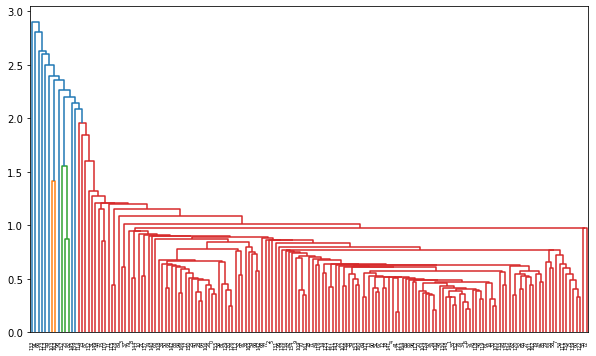

In [57]:
# single linkage
plt.figure(figsize=[10,6])
mergings = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

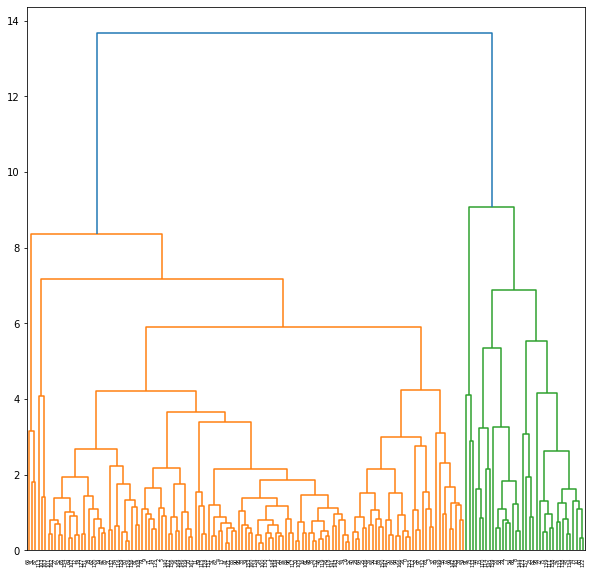

In [58]:
# complete linkage
plt.figure(figsize=[10,10])
mergings = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [59]:
#3 cluster
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [60]:
country['cluster_labels']=cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [61]:
country.cluster_labels.value_counts()

0    131
1     33
2      3
Name: cluster_labels, dtype: int64

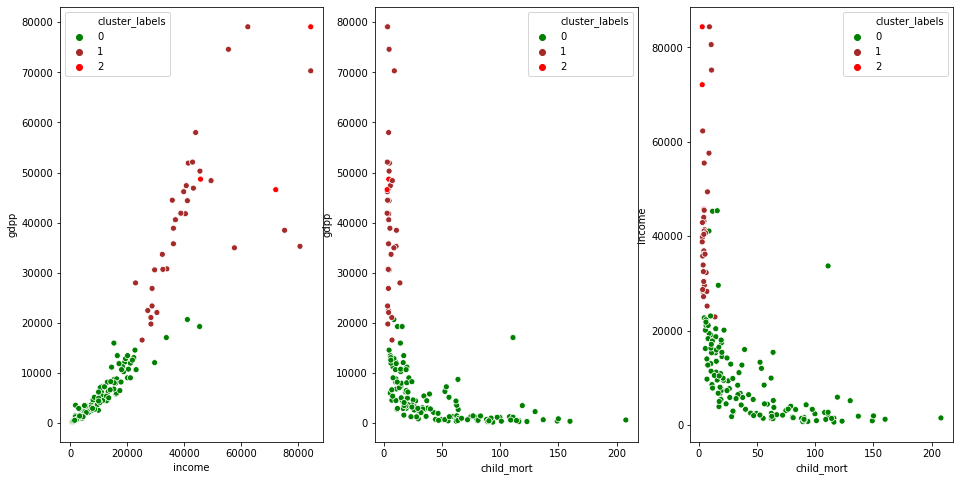

In [62]:
# scatterplot for 3 Feature consider for clustering the datas
plt.figure(figsize=[16,8])
plt.subplot(1,3,1)
sns.scatterplot(x='income',y='gdpp',hue='cluster_labels',legend='full',data=country,palette=['green','brown','red'])

plt.subplot(1,3,2)
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_labels',legend='full',data=country,palette=['green','brown','red'])
 
plt.subplot(1,3,3)
sns.scatterplot(x='child_mort',y='income',hue='cluster_labels',legend='full',data=country,palette=['green','brown','red'])
plt.show()

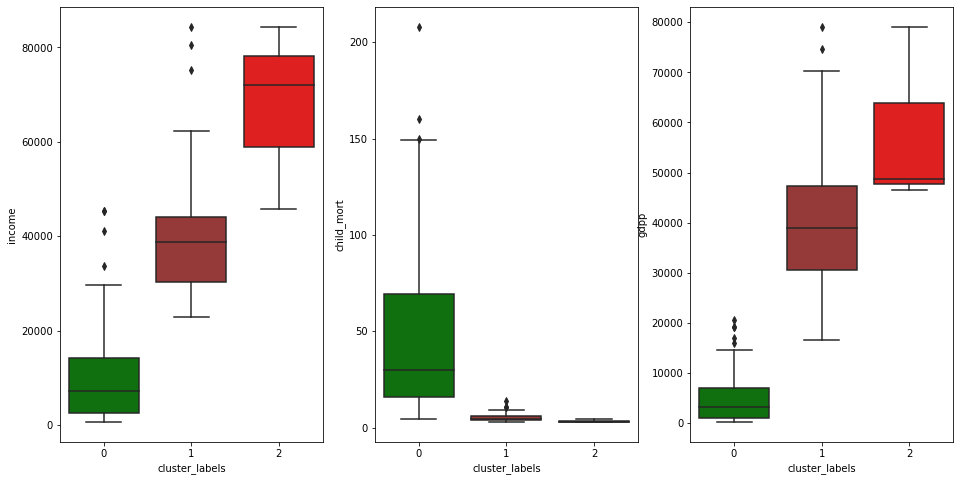

In [63]:
plt.figure(figsize=[16,8])
plt.subplot(1,3,1)
sns.boxplot(y='income',x='cluster_labels',data=country,palette=['green','brown','red'])

plt.subplot(1,3,2)
sns.boxplot(y='child_mort',x='cluster_labels',data=country,palette=['green','brown','red'])
 
plt.subplot(1,3,3)
sns.boxplot(y='gdpp',x='cluster_labels',data=country,palette=['green','brown','red'])
plt.show()

In [64]:
res2=country[['child_mort','income','gdpp']].groupby(country['cluster_labels']).mean()
res2

,child_mort,income,gdpp
cluster_labels,,,
0,47.373282,9443.992366,4793.236641
1,5.321212,41693.151515,40245.090909
2,3.266667,67391.333333,58129.333333


#### From the above plot we conclude that
- cluster-0 having high Child_mort rate
- cluster-0 having lowest income
- cluster-0 having lowest gdpp

In [65]:
cluster_sm=country[country['cluster_labels']==0]
cluster_sm.sort_values(['gdpp','income','child_mort'],ascending=[True,True,False] 
                      ).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,2,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,2,0


#### *As per Heirarchical Clustering, the countries which require aid are:*
- 1.Burundi
- 2.Liberia
- 3.Congo, Dem. Rep.
- 4.Niger
- 5.Sierra Leone
- 6.Madagascar
- 7.Mozambique
- 8.Central African Republic
- 9.Malawi
- 10.Eritrea

# Final conclusion :

#### Countries  got from K-means clustering are:

- Liberia
- Burundi
- Congo, Dem. Rep
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Eritrea
#### Countries got from Hierarchial clustering are:

- Liberia
- Burundi
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Eritrea


### Hence the final countries are :
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Eritrea